# Vamos a sacar datos del servidor de ajedrez lichess

Antes  de nada instalaremos bersek, una biblioteca que nos va a ayudar a interactuar con la API en general y con las necesidades de la información ajedrecística en particular.
Tiene dos características destacables:

- Reconoce la notación algebraica de las partidas como pgn y puede transformar un pgn en un string con la notación algebraica. ♟️pgn es la extensión en la que se guardan las partidas de ajedrez♟️
- Reconoce la notación fen para anotar posiciones. ♟️El sistema de notación fen (Forsyth-Edwards Notation) es una suerte de regex para anotar la posición de las piezas en un momento determinado. Se inventó a finales del XIX para apuntar la posición de partidas aplazadas♟️

In [ ]:
!pip install berserk

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import berserk
import os 
from dotenv import load_dotenv

In [2]:
plt.rcParams["figure.figsize"] = (15,6)

In [3]:
load_dotenv()

True

In [4]:
token = os.getenv("LICHESS") 

In [5]:
endpoint = 'https://lichess.org'

Autentificacion con token e inicio de sesion

In [6]:
session = berserk.TokenSession(token)
client =  berserk.Client(session=session)

# 1. Encontrar el mejor jugador de cada categoría

Primero vamos a pedirle al servidor los 10 mejores jugadores de cada categoría, para extraer el mejor de cada  una

In [7]:
top10 = client.users.get_all_top_10()
df_top10 = pd.DataFrame(top10)
df_top10.head(5)

,bullet,blitz,rapid,classical,ultraBullet,crazyhouse,chess960,kingOfTheHill,threeCheck,antichess,atomic,horde,racingKings
0,"{'id': 'night-king96', 'username': 'Night-King...","{'id': 'feokl1995', 'username': 'Feokl1995', '...","{'id': 'zhigalko_sergei', 'username': 'Zhigalk...","{'id': 'loy_konstantin', 'username': 'Loy_Kons...","{'id': 'ohanyaneminchess', 'username': 'Ohanya...","{'id': 'jannlee', 'username': 'JannLee', 'perf...","{'id': 'zhigalko_sergei', 'username': 'Zhigalk...","{'id': 'zhigalko_sergei', 'username': 'Zhigalk...","{'id': 'variantsonly', 'username': 'VariantsOn...","{'id': 'devansh2008', 'username': 'devansh2008...","{'id': 'cqq', 'username': 'CQQ', 'perfs': {'at...","{'id': 'mindhunter0101', 'username': 'mindhunt...","{'id': 'royalmaniac', 'username': 'RoyalManiac..."
1,"{'id': 'friendlyfish', 'username': 'friendlyfi...","{'id': 'friendlyfish', 'username': 'friendlyfi...","{'id': 'drvitman', 'username': 'Drvitman', 'pe...","{'id': 'casabianka', 'username': 'Casabianka',...","{'id': 'think_fast_move_fast', 'username': 'Th...","{'id': 'blitzbullet', 'username': 'blitzbullet...","{'id': 'blazinq', 'username': 'Blazinq', 'perf...","{'id': 'fmshawnrl123', 'username': 'fmshawnrl1...","{'id': 'zhigalko_sergei', 'username': 'Zhigalk...","{'id': 'kex09', 'username': 'Kex09', 'perfs': ...","{'id': 'fast-tsunami', 'username': 'fast-tsuna...","{'id': 'rayholt', 'username': 'RayHolt', 'perf...","{'id': 'r2300', 'username': 'r2300', 'perfs': ..."
2,"{'id': 'mutdpro', 'username': 'mutdpro', 'perf...","{'id': 'miawlet', 'username': 'Miawlet', 'perf...","{'id': 'durarbayli', 'username': 'Durarbayli',...","{'id': 'dennis1989', 'username': 'Dennis1989',...","{'id': 'blazinq', 'username': 'Blazinq', 'perf...","{'id': 'mugwort', 'username': 'Mugwort', 'perf...","{'id': 'ragehunter', 'username': 'Ragehunter',...","{'id': 'ragehunter', 'username': 'Ragehunter',...","{'id': 'cragpanda', 'username': 'cragpanda', '...","{'id': 'firebatprime', 'username': 'firebatpri...","{'id': 'subs123', 'username': 'Subs123', 'perf...","{'id': 'luquihorde08', 'username': 'LuquiHorde...","{'id': 'artem_medvedev-04', 'username': 'Artem..."
3,"{'id': 'watneg', 'username': 'Watneg', 'perfs'...","{'id': 'wollongong2021', 'username': 'Wollongo...","{'id': 'realdavidnavara', 'username': 'RealDav...","{'id': 'mw1966', 'username': 'MW1966', 'perfs'...","{'id': 'genialnost', 'username': 'genialnost',...","{'id': 'zyxon', 'username': 'zyxon', 'perfs': ...","{'id': 'spacecloser', 'username': 'spacecloser...","{'id': 'ragadingdong', 'username': 'Ragadingdo...","{'id': 'blitzbullet', 'username': 'blitzbullet...","{'id': 'europrofesional', 'username': 'EUROPRO...","{'id': 'vlad_00', 'username': 'vlad_00', 'perf...","{'id': 'stubenfisch', 'username': 'Stubenfisch...","{'id': 'thorax_laneus', 'username': 'Thorax_La..."
4,"{'id': 'arm-777777', 'username': 'ARM-777777',...","{'id': 'rebeccaharris', 'username': 'RebeccaHa...","{'id': 'ragadingdong', 'username': 'Ragadingdo...","{'id': 'self_service', 'username': 'self_servi...","{'id': 'zhigalko_sergei', 'username': 'Zhigalk...","{'id': 'kingswitcher', 'username': 'Kingswitch...","{'id': 'meneermandje', 'username': 'MeneerMand...","{'id': 'plohishhihi', 'username': 'PloHishHIHI...","{'id': 'neverenough', 'username': 'NeverEnough...","{'id': 'arimakat', 'username': 'arimakat', 'pe...","{'id': 'wolfram_ep', 'username': 'Wolfram_EP',...","{'id': 'sinamon73', 'username': 'Sinamon73', '...","{'id': 'seth_7777777', 'username': 'seth_77777..."


Solo nos interesan las variantes de ajedrez con las reglas clásicas, así que vamos a eliminar las columnas que no nos interesan y a quedarnos con el primerclasificado de cada disciplina

In [8]:
# Eliminamos las categorias que no nos interesan
df_top10.drop(['crazyhouse', 'chess960', 'kingOfTheHill', 'threeCheck', 
                          'antichess', 'atomic', 'horde', 'racingKings'], 
                          axis=1, inplace=True)

In [9]:
df_top10.columns = df_top10.columns.str.upper()
df_top10.head(5)

,BULLET,BLITZ,RAPID,CLASSICAL,ULTRABULLET
0,"{'id': 'night-king96', 'username': 'Night-King...","{'id': 'feokl1995', 'username': 'Feokl1995', '...","{'id': 'zhigalko_sergei', 'username': 'Zhigalk...","{'id': 'loy_konstantin', 'username': 'Loy_Kons...","{'id': 'ohanyaneminchess', 'username': 'Ohanya..."
1,"{'id': 'friendlyfish', 'username': 'friendlyfi...","{'id': 'friendlyfish', 'username': 'friendlyfi...","{'id': 'drvitman', 'username': 'Drvitman', 'pe...","{'id': 'casabianka', 'username': 'Casabianka',...","{'id': 'think_fast_move_fast', 'username': 'Th..."
2,"{'id': 'mutdpro', 'username': 'mutdpro', 'perf...","{'id': 'miawlet', 'username': 'Miawlet', 'perf...","{'id': 'durarbayli', 'username': 'Durarbayli',...","{'id': 'dennis1989', 'username': 'Dennis1989',...","{'id': 'blazinq', 'username': 'Blazinq', 'perf..."
3,"{'id': 'watneg', 'username': 'Watneg', 'perfs'...","{'id': 'wollongong2021', 'username': 'Wollongo...","{'id': 'realdavidnavara', 'username': 'RealDav...","{'id': 'mw1966', 'username': 'MW1966', 'perfs'...","{'id': 'genialnost', 'username': 'genialnost',..."
4,"{'id': 'arm-777777', 'username': 'ARM-777777',...","{'id': 'rebeccaharris', 'username': 'RebeccaHa...","{'id': 'ragadingdong', 'username': 'Ragadingdo...","{'id': 'self_service', 'username': 'self_servi...","{'id': 'zhigalko_sergei', 'username': 'Zhigalk..."


In [11]:
# Extraemos los mejores jugadores de cada categoría
best_players = []
for i in list(df_top10.columns):
    best_players.append(df_top10[i][0])

In [12]:
# Hacemos un dataframe con los datos de los mejores jugadores de cada categoría
df_top_palyers = pd.DataFrame(best_players, index=[list(df_top10.columns)])
df_top_palyers.drop(['patron', 'online'], axis = 1, inplace = True)

In [13]:
df_top_palyers


,id,username,perfs,title
BULLET,night-king96,Night-King96,"{'bullet': {'rating': 3146, 'progress': 30}}",GM
BLITZ,feokl1995,Feokl1995,"{'blitz': {'rating': 3042, 'progress': 2}}",GM
RAPID,zhigalko_sergei,Zhigalko_Sergei,"{'rapid': {'rating': 3016, 'progress': 33}}",GM
CLASSICAL,loy_konstantin,Loy_Konstantin,"{'classical': {'rating': 2518, 'progress': -4}}",NM
ULTRABULLET,ohanyaneminchess,OhanyanEminChess,"{'ultraBullet': {'rating': 2646, 'progress': 7}}",IM


In [14]:
# De la columna perfs solo nos interesa el rating, así que extraemos ese dato y eliminamos la columna
rat = []
for i in range(5):
    rat.append(df_top_palyers['perfs'][i][list(df_top_palyers['perfs'][i])[0]]['rating'])

df_top_palyers['rating']= rat
df_top_palyers.drop(['perfs'], axis = 1, inplace = True)


In [15]:
# Ya tenemos una tabla con los datos que nos interesan de los mejores jugadores
df_top_palyers

,id,username,title,rating
BULLET,night-king96,Night-King96,GM,3146
BLITZ,feokl1995,Feokl1995,GM,3042
RAPID,zhigalko_sergei,Zhigalko_Sergei,GM,3016
CLASSICAL,loy_konstantin,Loy_Konstantin,NM,2518
ULTRABULLET,ohanyaneminchess,OhanyanEminChess,IM,2646


# 2. Analizar la evolución de cada campeón

Ahora que tenemos el nombre y el id de los jugadores que nos interesan, podemos analizar su evolución desde que se dieron de alta en lichess

In [81]:
# Descargamos todas las partidas de Night-King96
games_night = client.games.export_by_player('Night-King96')

In [82]:
# Convertimos las partidas en un data frame
df_night = pd.DataFrame(games_night)

In [83]:
# Comprobamos que hay partidas de modalidades que no nos interesan
df_night.perf.unique()

array(['bullet', 'threeCheck', 'ultraBullet', 'kingOfTheHill', 'blitz',
       'chess960', 'fromPosition', 'horde', 'correspondence', 'rapid'],
      dtype=object)

In [84]:
# Eliminamos las partidas jugadas en modalidades que no nos interesan
df_night.drop(df_night[(df_night['perf'] == 'threeCheck') & 
                        (df_night['perf'] == 'kingOfTheHill') &
                        (df_night['perf'] == 'chess960') &
                        (df_night['perf'] == 'fromPosition') &
                        (df_night['perf'] == 'horde') &
                        (df_night['perf'] == 'correspondence')].index, inplace=True)

In [94]:
# Comprobamos que ya solo tenemos las partidas que nos interesan
df_night.perf.unique()

array(['bullet', 'ultraBullet', 'blitz', 'rapid'], dtype=object)

In [104]:
# Guardamos el data frame para no tener que volver a generarlo
df_night.to_pickle('night_games.pkl')

In [10]:
df_night = pd.read_pickle('night_games.pkl')

In [102]:
# Organizamos las partidas por fechas para luego ver su evolución en el rating
df_night.sort_values(by='lastMoveAt', inplace=True)

In [39]:
df_night.head(1)

,id,rated,variant,speed,perf,createdAt,lastMoveAt,status,players,winner,moves,clock,tournament,initialFen,swiss
12891,3vAEfxK5,True,standard,bullet,bullet,2018-02-20 23:44:53.189000+00:00,2018-02-20 23:46:31.176000+00:00,outoftime,"{'white': {'user': {'name': 'Night-King96', 't...",white,d4 g6 Nc3 Bg7 e4 d6 Be3 Nf6 f3 O-O Qd2 e5 dxe5...,"{'initial': 60, 'increment': 0, 'totalTime': 60}",NaN,NaN,NaN


Ahora vamos a crear una función que nos saque el ELO y la fecha para cada partida.

♟️ELO es la puntuación con la que se valora a los jugadores de ajedrez.

♟️En estos data frames el ELO se llama 'rating'

In [85]:
def evol_elo(df, name):
    '''
    Función para extraer el elo y la fecha de las partidas.
    Es importante tener en cuenta que no todas las partidas
    que se juegan reciben rating, también las hay amistosas,
    así que es conveniente aplicar programación defensiva.
    Arg:
        df (data frame): data frame del que vamos a extraer los datos
        name (string): nombre del jugador del que vamos a extraer los datos
    Return:
        Devuelve el elo y la fecha por cada partida
    '''
    rating = []
    date = []
    for i in range(len(df['id'])):
        try:
            if (df['players'][i]['white']['user']['name'] == name):
                rating.append(df['players'][i]['white']['rating'])
                date.append(df['lastMoveAt'][i])
            elif (df_night_bullet['players'][i]['black']['user']['name'] == name):
                rating.append(df['players'][i]['black']['rating'])
                date.append(df['lastMoveAt'][i])
        except:
            pass
    return rating, date

In [12]:
# Vamos a aislar las partidas bullet
df_night_bullet = df_night.drop(df_night[(df_night['perf'] == 'ultraBullet') & 
                                        (df_night['perf'] == 'blitz') &
                                        (df_night['perf'] == 'rapid')].index)


In [32]:
# Y lo guardamos
df_night_bullet.to_pickle('night_games_bullet.pkl')

In [72]:
# Vamos a aislar las partidas ultraBullet
df_night_ultraBullet = df_night.drop(df_night[(df_night['perf'] == 'bullet') & 
                                        (df_night['perf'] == 'blitz') &
                                        (df_night['perf'] == 'rapid')].index)

In [130]:
# Y lo guardamos
df_night_ultraBullet.to_pickle('night_games_ultraBullet.pkl')

In [80]:
# Vamos a aislar las partidas blitz
df_night_blitz = df_night.drop(df_night[(df_night['perf'] == 'bullet') & 
                                        (df_night['perf'] == 'ultraBullet') &
                                        (df_night['perf'] == 'rapid')].index)

In [88]:
# Y lo guardamos
df_night_blitz.to_pickle('night_games_blitz.pkl')

In [89]:
# Vamos a aislar las partidas rapid  
df_night_rapid = df_night.drop(df_night[(df_night['perf'] == 'bullet') & 
                                        (df_night['perf'] == 'ultraBullet') &
                                        (df_night['perf'] == 'blitz')].index)

In [96]:
# Y lo guardamos
df_night_rapid.to_pickle('night_games_rapid.pkl')

In [86]:
# Aplicamos la funcion elo_evol para extraer lo valores en partidas bullet
date_night_bullet = evol_elo(df_night_bullet, 'Night-King96')[1]
rating_night_bullet = evol_elo(df_night_bullet, 'Night-King96')[0]

In [112]:
# Aplicamos la funcion elo_evol para extraer lo valores en partidas ultraBullet
date_night_ultraBullet = evol_elo(df_night_ultraBullet, 'Night-King96')[1]
rating_night_ultraBullet = evol_elo(df_night_ultraBullet, 'Night-King96')[0]

In [101]:
# Aplicamos la funcion elo_evol para extraer lo valores en partidas blitz
date_night_blitz = evol_elo(df_night_blitz, 'Night-King96')[1]
rating_night_blitz = evol_elo(df_night_blitz, 'Night-King96')[0]

In [102]:
# Aplicamos la funcion elo_evol para extraer lo valores en partidas rapid
date_night_rapid = evol_elo(df_night_rapid, 'Night-King96')[1]
rating_night_rapid = evol_elo(df_night_rapid, 'Night-King96')[0]

Y ahora nos vamos a hacer una tabla guapa para ver cómo ha evolucionado el jugador en cada una de las disciplinas desde que se dio de alta en el servidor

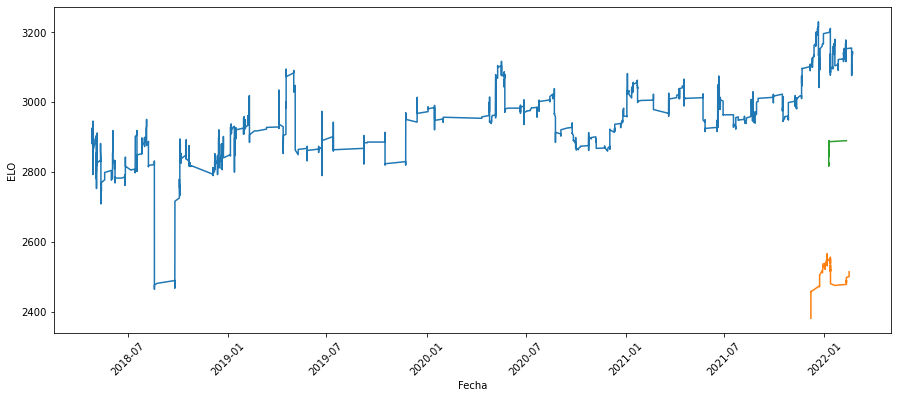

In [103]:
plt.plot(date_night_bullet, rating_night_bullet, label = 'bullet')
plt.plot(date_night_ultraBullet, rating_night_ultraBullet, label = 'ultraBullet')
plt.plot(date_night_blitz, rating_night_blitz, label = 'blitz')
plt.plot(date_night_rapid, rating_night_rapid, label = 'rapid')
plt.xlabel("Fecha")
plt.ylabel("ELO")
plt.xticks(rotation=45)

plt.show()

Podemos comprobar que prácticamente sólo ha jugado en la categoría en la que ocupa el primer puesto.
En ultraBullet y blitz a penas empezó a jugar con rating hace unos meses y en rapid no ha jugado ninguna partida con puntuación.
También queda constatado que ha mejorado su nivel desde que comenzó a competir en el servidor.

Ahora vamos a sacar la gráfica de los otros campeones, pero sólo en la modalidad en la que son los mejores, para comprobar si todos han tenido una evolución en su juego similar

In [8]:
# Descargamos todas las partidas de Feokl1995
games_feok = client.games.export_by_player('Feokl1995')

In [9]:
# Convertimos las partidas en un data frame
df_feok = pd.DataFrame(games_feok)

In [10]:
# Comprobamos que hay partidas de modalidades que no nos interesan
df_feok.perf.unique()

array(['blitz', 'bullet', 'fromPosition', 'chess960', 'rapid',
       'classical'], dtype=object)

In [11]:
# Guardamos el data frame para no tener que volver a generarlo
df_feok.to_pickle('feok_games.pkl')

In [15]:
# Eliminamos las partidas jugadas en modalidades que no nos interesan para quedarno solo con blitz
df_feok_biltz = df_feok.drop(df_feok[(df_feok['perf'] == 'bullet') & 
                        (df_feok['perf'] == 'rapid') &
                        (df_feok['perf'] == 'chess960') &
                        (df_feok['perf'] == 'fromPosition') &
                        (df_feok['perf'] == 'classical')].index)

In [31]:
df_feok_biltz.perf.unique()

array(['blitz'], dtype=object)

In [36]:
# Organizamos las partidas por fechas para luego ver su evolución en el rating
df_feok_biltz.sort_values(by='lastMoveAt', inplace=True)

In [35]:
# Y lo guardamos
df_feok_biltz.to_pickle('feok_biltz_games.pkl')

In [92]:
# Aplicamos la funcion elo_evol para extraer lo valores en partidas blitz
date_feok_blitz = evol_elo(df_feok_biltz, 'Feokl1995')[1]
rating_feok_blitz = evol_elo(df_feok_biltz, 'Feokl1995')[0]

In [100]:
# Descargamos todas las partidas de Zhigalko_Sergei
games_zhigalko = client.games.export_by_player('Zhigalko_Sergei')

In [101]:
# Convertimos las partidas en un data frame
df_zhigalko = pd.DataFrame(games_zhigalko)

In [102]:
# Comprobamos que hay partidas de modalidades que no nos interesan
df_zhigalko.perf.unique()

array(['blitz', 'chess960', 'kingOfTheHill', 'threeCheck', 'bullet',
       'rapid', 'ultraBullet', 'crazyhouse', 'fromPosition', 'classical',
       'racingKings'], dtype=object)

In [103]:
# Guardamos el data frame para no tener que volver a generarlo
df_zhigalko.to_pickle('zhigalko_games.pkl')

In [ ]:
df_zhigalko_rapid = df_zhigalko.drop(df_zhigalko[(df_zhigalko['perf'] == 'blitz') & 
                        (df_zhigalko['perf'] == 'chess960') &
                        (df_zhigalko['perf'] == 'kingOfTheHill') &
                        (df_zhigalko['perf'] == 'threeCheck') &
                        (df_zhigalko['perf'] == 'bullet') &
                        (df_zhigalko['perf'] == 'ultraBullet') &
                        (df_zhigalko['perf'] == 'crazyhouse') &
                        (df_zhigalko['perf'] == 'fromPosition') &
                        (df_zhigalko['perf'] == 'classical') &
                        (df_zhigalko['perf'] == 'racingKings')].index)

In [ ]:
df_zhigalko_rapid.perf.unique()

In [106]:
# Descargamos todas las partidas de Loy_Konstantin
games_loy = client.games.export_by_player('Loy_Konstantin')

In [107]:
# Convertimos las partidas en un data frame
df_loy = pd.DataFrame(games_loy)

In [111]:
# Comprobamos que hay partidas de modalidades que no nos interesan
df_loy.perf.unique()

array(['classical', 'blitz', 'fromPosition', 'rapid', 'bullet',
       'correspondence', 'chess960', 'ultraBullet', 'crazyhouse',
       'antichess', 'atomic', 'racingKings', 'kingOfTheHill', 'horde',
       'threeCheck'], dtype=object)

In [108]:
# Guardamos el data frame para no tener que volver a generarlo
df_loy.to_pickle('loy_games.pkl')

In [124]:
# Descargamos todas las partidas de OhanyanEminChess
games_ohan = client.games.export_by_player('OhanyanEminChess')

In [125]:
# Convertimos las partidas en un data frame
df_ohan = pd.DataFrame(games_ohan)

In [126]:
# Guardamos el data frame para no tener que volver a generarlo
df_ohan.to_pickle('ohan_games.pkl')

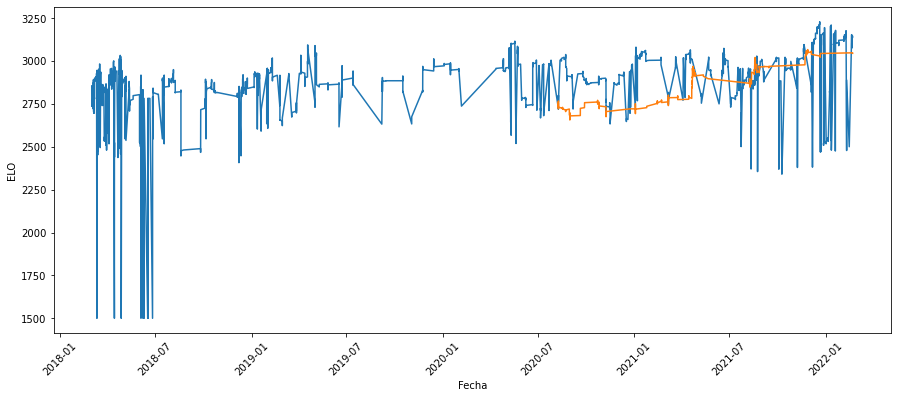

In [99]:
plt.plot(date_night_bullet, rating_night_bullet, label = 'bullet')
plt.plot(date_feok_blitz, rating_feok_blitz, label = 'blitz')
plt.xlabel("Fecha")
plt.ylabel("ELO")
plt.xticks(rotation=45)

plt.show()

In [64]:
def reverse(lst):
    new_lst = lst[::-1]
    return new_lst

In [88]:
date_night_bullet_ = reverse(date_night_bullet)

In [ ]:
print(date_night_bullet_)

In [90]:
rating_night_bullet_ = reverse(rating_night_bullet)

In [95]:
date_feok_blitz_ = reverse(date_feok_blitz)
rating_feok_blitz_ = reverse(rating_feok_blitz)

In [ ]:
print(date_feok_blitz_)